In [13]:
%matplotlib notebook
import numpy as np
import os
import glob
import skimage.io
import matplotlib.pyplot as plt
import re
import astra

In [7]:
def load_images(directory):
    images = glob.glob(directory + '/scan*.tif')
    #print(images)
    print(images[0])
    
    images.sort(key=lambda f: int(re.search(r'scan_([0-9]+).tif',f).group(1)))
    
    print(images[0])
    first_image = skimage.io.imread(images[0])
    x,y = first_image.shape
    sinograms = np.zeros((len(images),y))
    
    print(sinograms.shape)
    
    for i, imagefile in enumerate(images):
        image = skimage.io.imread(imagefile)
        sinograms[i] = image[x // 2]
    
    #plt.imshow(sinograms, cmap='gray')
    #plt.imsave('sinogram.tif', sinograms)
    
    return sinograms, images

In [15]:
sinogram, images = load_images('/home/fgustafsson/ipi/wooden_block/')

/home/fgustafsson/ipi/wooden_block/scan_001281.tif
/home/fgustafsson/ipi/wooden_block/scan_000000.tif
(1801, 972)


<IPython.core.display.Javascript object>


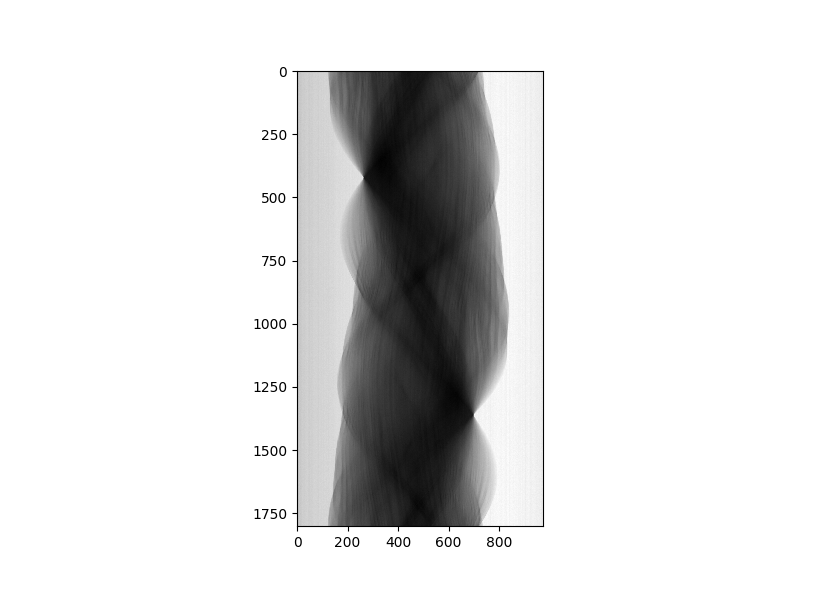

In [16]:
plt.imshow(sinogram, cmap='gray')

<IPython.core.display.Javascript object>


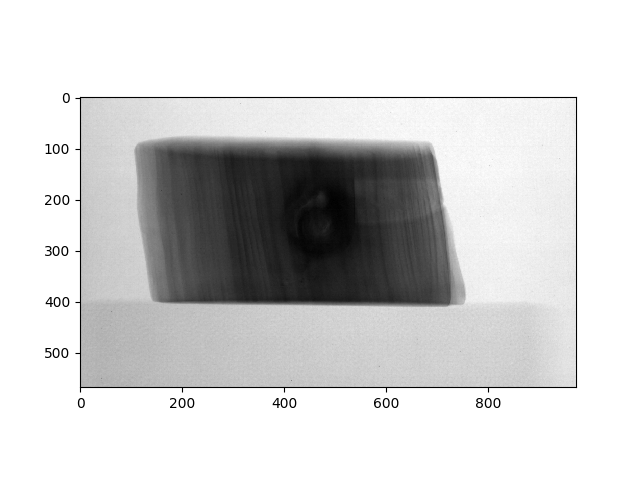

In [23]:
first_image = skimage.io.imread(images[0])
plt.imshow(first_image, cmap='gray')

scanned_angles = first_image.shape[0] - 1

scan_width = first_image.shape[1]

In [30]:
n_iter = 5
vol_geom = astra.create_vol_geom(scan_width, scan_width)
proj_angles = np.linspace(0, (scanned_angles -1.0)*2.0*np.pi / scanned_angles, scanned_angles)
print(proj_angles[0])
print(proj_angles[-1])
proj_geom = astra.create_proj_geom('fanflat', 1.0, scan_width, proj_angles, 313.0, 498.0)
proj_id = astra.create_projector('strip_fanflat', proj_geom, vol_geom)
W = astra.OpTomo(proj_id)
f_inv  = W.reconstruct('SIRT', sinogram, iterations=n_iter,extraOptions={'MinConstraint':0.0})


0.0
6.2721038516113685


Exception: The dimensions of the data do not match those specified in the geometry.